In [1]:
import json


file_path = "johanna.json"

In [2]:
with open(file_path, "r") as f:
    benchmark_data = json.load(f)

In [7]:
benchmark_data.keys()

dict_keys(['machine_info', 'commit_info', 'benchmarks', 'datetime', 'version'])

In [10]:
results = benchmark_data["benchmarks"]

results[0].keys()

dict_keys(['group', 'name', 'fullname', 'params', 'param', 'extra_info', 'options', 'stats'])

In [14]:
results[1]["stats"]

{'min': 0.021700709010474384,
 'max': 0.022373625077307224,
 'mean': 0.022058116644620894,
 'stddev': 0.00024478338410269566,
 'rounds': 5,
 'median': 0.022034583031199872,
 'iqr': 0.00027266648248769343,
 'q1': 0.021941083308774978,
 'q3': 0.02221374979126267,
 'iqr_outliers': 0,
 'stddev_outliers': 2,
 'outliers': '2;0',
 'ld15iqr': 0.021700709010474384,
 'hd15iqr': 0.022373625077307224,
 'ops': 45.33478610667609,
 'total': 0.11029058322310448,
 'iterations': 1}

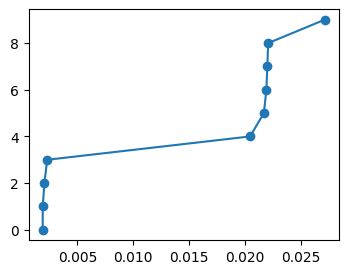

In [24]:
ipoptlike_results = [r for r in results if "runtime_constrained" in r["name"]]
ipoptlike_times = sorted([r["stats"]["min"] for r in ipoptlike_results])

import jax.numpy as jnp
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
times = jnp.array(ipoptlike_times)
ax.plot(times, jnp.arange(times.size), "o-")

In [ ]:
import equinox as eqx


class _State(eqx.Module):
    a: float


class MyModule(eqx.Module):
    def init(self) -> _State:
        return _State(a=0.0)

    def __call__(self, state: _State) -> _State:
        if state.a > 5.0:
            return self.init()
        else:
            return _State(a=state.a + 1.0)


m = MyModule()

s = m.init()
for i in range(10):
    s = m(s)
    print(s.a)

# TODO: move initialisation of EVERYTHING into the solver.init, including the dual
# variables
# Then after feasibility restoration, simply call solver.init again

1.0
2.0
3.0
4.0
5.0
6.0
0.0
1.0
2.0
3.0
